In [8]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [4]:
d = pd.read_excel('a.xls') 
time_bound_sup = datetime.time(19,0,0) # Se asigna un limite superior a uan función llamada (time_bound_sup) a la hora de (19,0,0) donde (h,m,s)
time_bound_inf = datetime.time(5,0,0) # Se asigna un limite inferior (5,0,0).
time = d.values[:,1]
ind1 = ~pd.isnull(time)
time = d.values[ind1,1]
data = d.values[ind1,2:-1]
target = d.values[ind1,-1]

ind2 = np.logical_and(time>time_bound_inf,time<time_bound_sup)

DATA = data[ind2,:]
TIME = time[ind2]
TARGET = target[ind2]
NAMES_DATA = np.asarray(d.columns[2:-1])
NAMES_TARGET = d.columns[-1]

ind_delete = []
for j in range(DATA.shape[1]): 
    for i in range(DATA.shape[0]):
        if DATA[i,j]=='---':
            ind_delete.append(i)
            
ind_delete = np.asarray(np.unique(ind_delete))
DATA = np.delete(DATA,ind_delete,0).astype('float')
TIME = np.delete(TIME,ind_delete,0)
TARGET = np.delete(TARGET,ind_delete,0).astype('float')
print(DATA.shape)
print(TIME.shape)
print(TARGET.shape)

(11811, 19)
(11811,)
(11811,)


In [5]:
data_frame = pd.DataFrame(DATA,columns=NAMES_DATA)
print(data_frame)

       Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  Wind Speed  Wind Dir  \
0          27.9     28.2      27.8     54.0     17.8         3.1      12.0   
1          25.7     28.0      25.7     62.0     17.9         2.2      13.0   
2          20.8     21.1      20.6     93.0     19.6         0.9       6.0   
3          20.4     20.7      20.4     95.0     19.6         0.9       6.0   
4          21.7     21.7      20.4     91.0     20.1         0.9      10.0   
5          22.9     22.9      21.6     84.0     20.1         0.9      10.0   
6          25.2     25.7      22.9     72.0     19.8         0.9       6.0   
7          25.8     26.1      25.2     68.0     19.5         0.9      10.0   
8          26.7     26.7      25.8     59.0     18.0         1.8      12.0   
9          28.9     29.1      26.7     52.0     18.1         1.3       0.0   
10         27.1     28.9      27.1     61.0     18.9         2.7       1.0   
11         25.8     27.1      25.8     64.0     18.5         3.1

/Users/alejandraarregocesramirez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23cc76d8>,
      dtype=object)

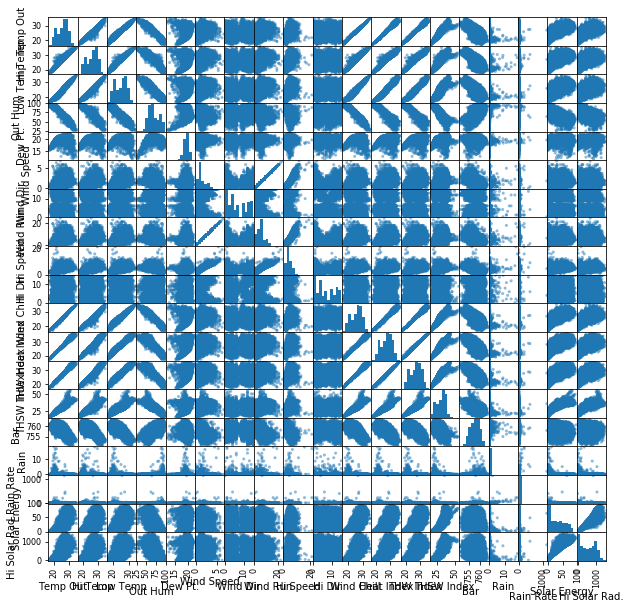

In [6]:
data_frame = pd.DataFrame(DATA,columns=NAMES_DATA)
pd.scatter_matrix(data_frame,figsize=(10,10))

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data_frame,TARGET,random_state=0,test_size=0.20)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_test

(9448, 19) (2363, 19) (9448,) (2363,)


,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,Hi Dir,Wind Chill,Heat Index,THW Index,THSW Index,Bar,Rain,Rain Rate,Solar Energy,Hi Solar Rad.
4671,21.3,21.3,20.4,86.0,18.9,0.4,4.0,1.61,1.8,4.0,21.3,22.3,22.3,23.8,761.1,0.0,0.0,10.84,192.0
7946,22.7,22.7,21.2,84.0,19.9,0.4,2.0,1.61,2.2,1.0,22.7,23.8,23.8,26.8,759.1,0.0,0.0,15.48,545.0
6303,25.4,25.8,25.4,70.0,19.5,0.9,3.0,3.22,3.1,4.0,25.4,26.5,26.5,30.5,757.6,0.0,0.0,23.05,336.0
5875,29.4,30.2,29.3,62.0,21.3,2.2,0.0,8.05,5.8,0.0,29.4,32.2,32.2,38.1,754.1,0.0,0.0,26.84,424.0
8770,29.4,29.6,28.7,56.0,19.7,0.9,1.0,3.22,2.7,2.0,29.4,31.2,31.2,35.4,756.7,0.0,0.0,32.00,754.0
8117,25.7,25.7,24.5,72.0,20.3,1.3,6.0,4.83,4.5,6.0,25.7,27.0,27.0,32.3,760.1,0.0,0.0,41.89,821.0
1861,20.9,20.9,19.9,86.0,18.5,0.4,12.0,1.61,1.3,12.0,20.9,21.9,21.9,21.0,758.1,0.0,0.0,0.09,11.0
7836,31.2,33.3,31.1,50.0,19.5,2.2,1.0,8.05,7.2,0.0,31.2,33.1,33.1,39.3,753.1,0.0,0.0,48.77,944.0
4842,24.5,24.5,24.0,77.0,20.2,1.3,10.0,4.83,4.0,7.0,24.5,25.9,25.9,29.1,759.6,0.0,0.0,23.83,341.0
9904,20.8,21.4,20.7,92.0,19.5,0.9,1.0,3.22,4.0,4.0,20.8,22.1,22.1,20.9,758.9,0.0,0.0,0.00,0.0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(DATA,TARGET,random_state=0,test_size=0.20)

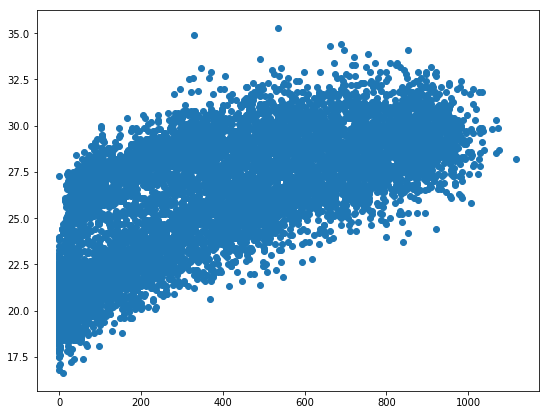

Wind Chill 


In [10]:
var = 10
plt.figure(1, figsize=(9, 7))
plt.scatter(Y_train,X_train[:,var])
plt.show()
print(NAMES_DATA[var])

In [11]:
mdl = KNeighborsRegressor(n_neighbors=3)
mdl.fit(X_train,Y_train)
y_est = mdl.predict(X_test[120,:].reshape(1, -1))##Evaluo mi modelo con xtest y ytest
print(X_test[1,:])
print('train score: ',mdl.score(X_train,Y_train))##Al evaluar obteno que mi score es casi 100%. 
print('rad_pred: ',y_est)
print('rad_orig: ',Y_test[120])
#print(TIME[4671])

[2.270e+01 2.270e+01 2.120e+01 8.400e+01 1.990e+01 4.000e-01 2.000e+00
 1.610e+00 2.200e+00 1.000e+00 2.270e+01 2.380e+01 2.380e+01 2.680e+01
 7.591e+02 0.000e+00 0.000e+00 1.548e+01 5.450e+02]
train score:  0.9961331439145488
rad_pred:  [462.33333333]
rad_orig:  439.0
09:00:00


In [12]:
mdl2 = LinearRegression()
mdl2.fit(X_train,Y_train)
y_est = mdl2.predict(X_test)
print('train score: ',mdl2.score(X_train,Y_train))## El train y test presentan buen desempeño. 
print('test score: ',mdl2.score(X_test,Y_test))

train score:  0.9999999878817533
test score:  0.9999999875113454


train score:  0.9999999878816187
test score:  0.9999999875113339


([<matplotlib.axis.XTick at 0x1a2e5d8908>,
 <a list of 18 Text xticklabel objects>)

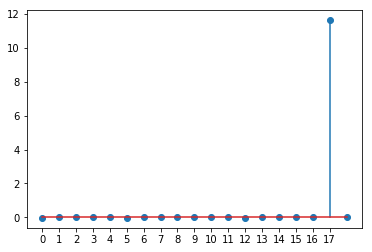

In [13]:
mdl3 = Ridge(alpha=0.1)
mdl3.fit(X_train,Y_train)
y_est = mdl3.predict(X_test)
print('train score: ',mdl3.score(X_train,Y_train))## Buen modelo 
print('test score: ',mdl3.score(X_test,Y_test))
##plt.stem(mdl3.coef_.ravel())
##plt.xticks(np.arange(0, 18, step=1))

train score:  0.9999998709584297
test score:  0.9999998404084659


([<matplotlib.axis.XTick at 0x1a2e7738d0>,
 <a list of 18 Text xticklabel objects>)

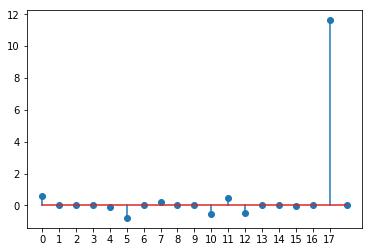

In [14]:
mdl4 = Lasso(alpha=0.00001)
mdl4.fit(X_train,Y_train)
y_est = mdl4.predict(X_test)
print('train score: ',mdl4.score(X_train,Y_train))
print('test score: ',mdl4.score(X_test,Y_test))
plt.stem(mdl4.coef_)
plt.xticks(np.arange(0, 18, step=1))

In [19]:
mdl5 = MLPRegressor(hidden_layer_sizes=(100,),activation='logistic')## 1 capa oculta de 100 neuronas, logsitca es la función de activaciñon la cual es similar a un curva. 
mdl5.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl5.score(X_train,Y_train))
print('test score: ',mdl5.score(X_test,Y_test))

train score:  0.8539623786760194
test score:  0.8591677726992266


/Users/alejandraarregocesramirez/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
mdl5 = MLPRegressor(hidden_layer_sizes=(400,100),activation='logistic')## 1 capa oculta de 100 neuronas, logsitca es la función de activaciñon la cual es similar a un curva. 
mdl5.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl5.score(X_train,Y_train))
print('test score: ',mdl5.score(X_test,Y_test))

/Users/alejandraarregocesramirez/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train score:  0.7978784508151942
test score:  0.8031996083782929


In [23]:
mdl5 = MLPRegressor(hidden_layer_sizes=(100,60,20),activation='logistic')## 1 capa oculta de 100 neuronas, logsitca es la función de activaciñon la cual es similar a un curva. 
mdl5.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl5.score(X_train,Y_train))
print('test score: ',mdl5.score(X_test,Y_test))

train score:  -0.5731489191943668
test score:  -0.5924587125992626


/Users/alejandraarregocesramirez/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
mdl6 = DecisionTreeRegressor(max_depth=1)
mdl6.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl6.score(X_train,Y_train))
print('test score: ',mdl6.score(X_test,Y_test))

train score:  0.7586285630247733
test score:  0.7554667914123466


In [25]:
mdl6 = DecisionTreeRegressor(max_depth=3)
mdl6.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl6.score(X_train,Y_train))
print('test score: ',mdl6.score(X_test,Y_test))

train score:  0.9854588222102896
test score:  0.9849329649933346


In [ ]:
mdl6 = DecisionTreeRegressor(max_depth=4)
mdl6.fit(X_train,Y_train.ravel())
y_est = mdl5.predict(X_test)
print('train score: ',mdl6.score(X_train,Y_train))
print('test score: ',mdl6.score(X_test,Y_test))